In [18]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('ccl-22.sqlite')

c = conn.cursor()

c.execute('''
select
    t.race,
    case when tm.value < 900 then 900.0 else round((tm.value+0.0)/50,0)*50 end as tv,
    sum(tm.win) + sum(tm.draw) + sum(tm.loss) as games,
    sum(tm.win) as wins,
    sum(tm.draw) as draws,
    sum(tm.loss) as losses,
    (sum(tm.win+0.0) + sum(tm.draw+0.0)/2)/(sum(tm.win+0.0) + sum(tm.draw+0.0) + sum(tm.loss+0.0)) as win_percent
from teammatches tm
inner join teams t
    on tm.idteamlisting = t.id
where tm.value <= 1840
group by 
    t.race,
    case when tm.value < 900 then 900.0 else round((tm.value+0.0)/50,0)*50 end
    ''')

#print(c.fetchall())
results = c.fetchall()
list_results = [list(i) for i in results]


In [19]:
race = []
tv = []
winrate = []

for i in list_results:
    race.append(i[0])
    tv.append(i[1])
    winrate.append(i[6])

race_list = list(set(race))

In [15]:
from statistics import mean

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

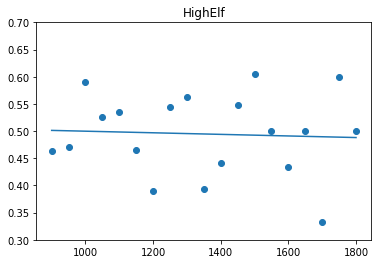

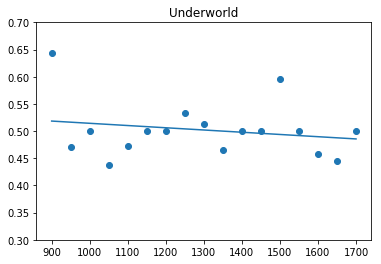

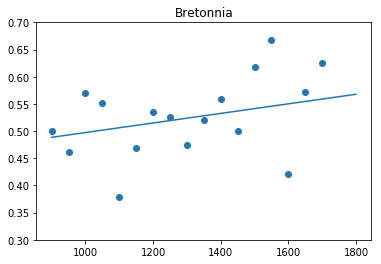

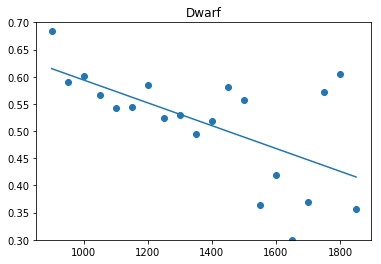

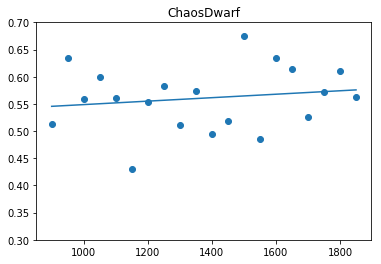

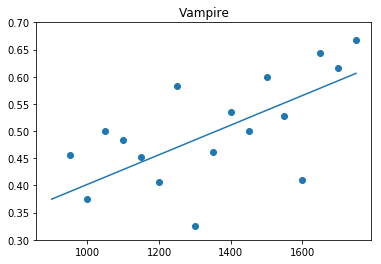

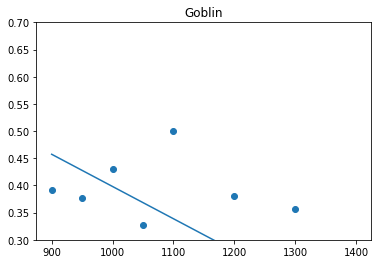

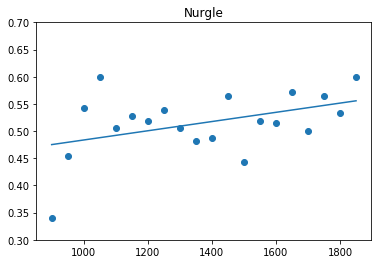

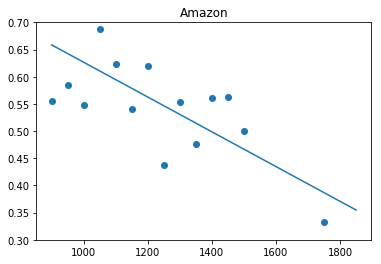

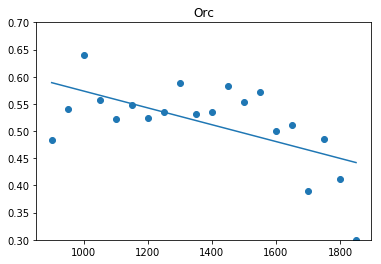

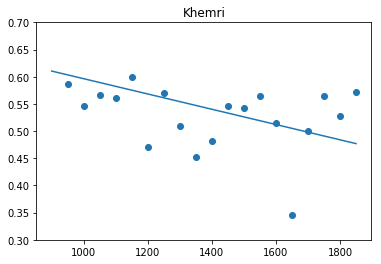

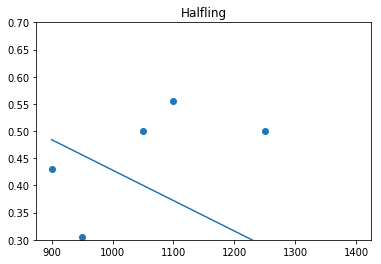

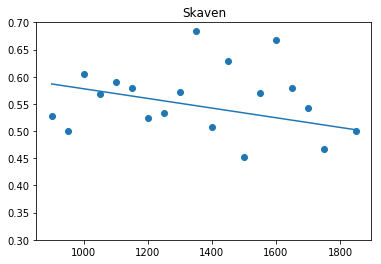

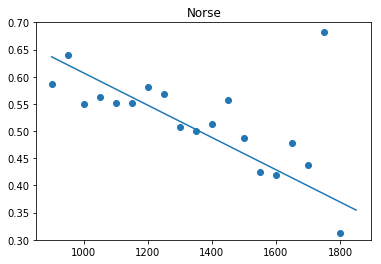

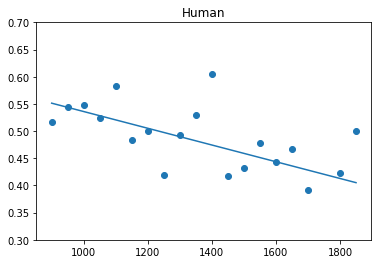

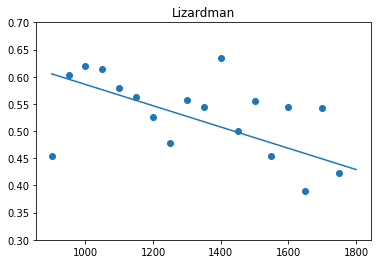

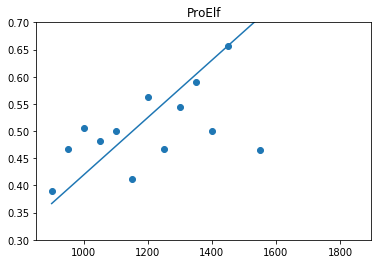

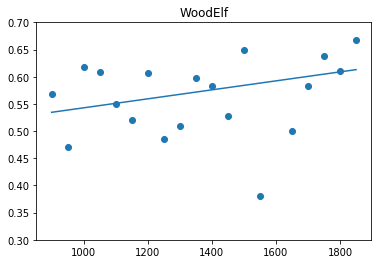

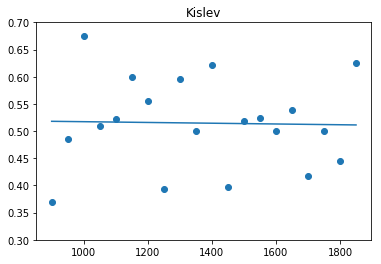

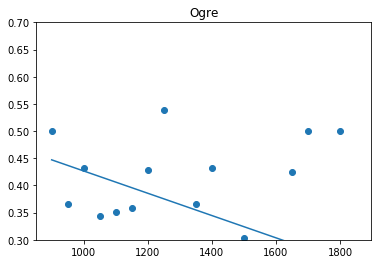

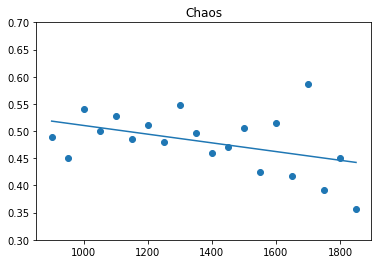

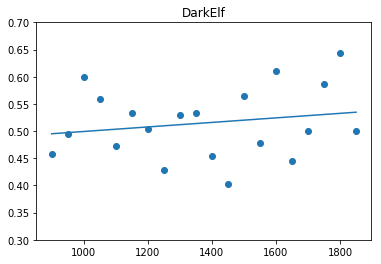

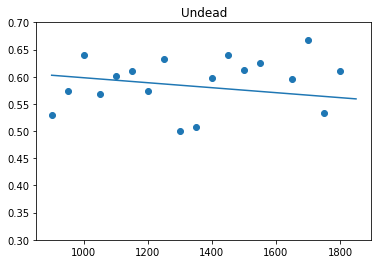

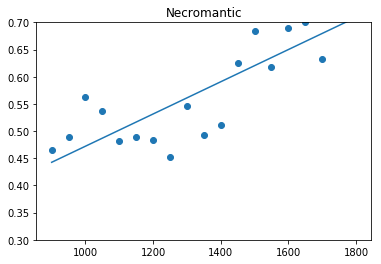

In [21]:
for races in race_list:
    plot_tv = []
    plot_winrate = []
    fig = plt.figure()
    for i in range(len(list_results)):
        if race[i] == races:
            plot_tv.append(tv[i])
            plot_winrate.append(winrate[i])
    plt.ylim(0.3,0.7)
    plt.scatter(plot_tv,plot_winrate)
    
    #creating best fit line
    m, b = best_fit_slope_and_intercept(np.asarray(plot_tv), np.asarray(plot_winrate))
    regression_line = [(m*x)+b for x in plot_tv]
    plt.plot(plot_tv,regression_line)
    
    plt.title(races)
    fig.savefig(races + '-scatter.png')
